In [13]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

### 실습1. 평균 검정(모집단 표준편차를 모르는 경우)

고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후, 다음과 같은  
10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가?(유의수준 = 0.05)

In [11]:
data = [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]

# 가설검정
귀무가설 : '개선활동은 만족도를 변화시키지 않았다'
대립가설 : '개선활동이 만족도를 변화시켰다'

# 1-Sample t-test
t_result = stats.ttest_1samp(data, 78.0)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('1-Sample t-test')
print('t 통계량 : {}'.format(t))
print('p-value :{}'.format(p))

1-Sample t-test
t 통계량 : 3.379
p-value :0.008


해석 : 검정 결과, t 통계량은 3.379, p-value는 0.008이 나왔습니다.  
p-value가 0.05보다 작으므로 검정 결과가 통계적으로 유의하다고 볼 수 있습니다.  
따라서, 개선활동은 고객만족도를 변화시켰다고 할 수 있습니다.

### 실습2. Sample t-test

제품을 A 공급자와 B 공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.  
공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 = 0.05)

In [28]:
A_data = [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]
B_data = [1.435, 1.572, 1.486, 1.548, 1.511, 1.457, 1.404, 1.883]

귀무가설 : '공급자 간에 모평균에 차이가 없다'
대립가설 : '공급자 간에 모평균에 차이가 있다'
    
print(shapiro(A_data))
print(shapiro(B_data))

statistic, pvalue = stats.levene(A_data, B_data)

print('등분산 검정 \n검정통계량 : {0:.3f} \np-value : {1:.3f}'.format(statistic, pvalue))

# 등분산 검정 결과, p-value가 0.518로 유의수준 0.05보다 크므로 등분산성을 충족한다고 볼 수 있다.

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)
ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)
등분산 검정 
검정통계량 : 0.441 
pvalue : 0.518


In [29]:
# 2-Sample t-test
t_result = stats.ttest_ind(A_data, B_data)

# 2-Sample t-test
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t : {}".format(t))
print("p : {}".format(p))

2-Sample t-test
t : 1.7
p : 0.111


해석 : 2 Sample t-test 결과, 검정통계량은 1.7, p-value은 0.111이 나왔습니다.  
p-value가 0.05보다 크므로, 검정 결과는 통계적으로 유의하지 않다고 볼 수 있습니다.  
따라서, A,B 두 공급자 간 제품의 모평균에 차이가 없다고 할 수 있습니다.

### 실습3. Paired t-test

 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.  
 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [30]:
df1 = [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]
df2 = [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]

귀무가설 : '학원수강 전후의 성적은 차이가 없다'
대립가설 : '학원수강 전후의 성적은 차이가 있다'
    
# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('Paired t-test')
print('t : {}'.format(t))
print('p : {}'.format(p))

Paired t-test
t : -2.266
p : 0.05


해석 : 검정 결과, Paired t-test의 검정통계량은 -2.266, p-value는 0.05 입니다.  
유의수준 5%에서 p-value가 0.05이므로, 학원수강 전후에 차이가 있다고 할 수 있습니다.  
검정통계량이 -2.266이므로, 수강 후 점수가 더 높다고 할 수 있습니다. 

### 실습4. 1 Proportion test

동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며  
뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 0.05로써 검정하라.  
정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다. 

In [75]:
귀무가설 : '해당 동전은 앞면이 나올 확률이 정상적인 동전과 같다'
대립가설 : '해당 동전은 앞면이 나올 확률이 정상적인 동전과 다르다'
    
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print('1 Proportion test')
print('z : {0:0.3f}'.format(stat))
print('p : {0:0.3f}'.format(pval))

1 Proportion test
z : -2.041
p : 0.041


해석 : 검정 결과, 검정통계량은 -2.041, p-value는 0.041 입니다.  
유의수준 0.05에서 p-value가 0.041이므로, 해당 검정은 통계적으로 유의하다고 볼 수 있다.  
즉, 해당 동전은 앞면이 나올 확률이 정상적인 동전과 다르다고 할 수 있다.

### 실습5 2 Proportion test

동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.  
두 공정의 불량률이 같다고 할 수 있는가? (유의수준 = 0.05)  

In [31]:
# 공장 A
N1 = 1200
X1 = 14

# 공장 B
N2 = 1200
X2 = 5

귀무가설 : '두 공장의 불량률은 같다'
대립가설 : '두 공장의 불량률은 같지 않다'

In [32]:
count = ([14, 5])
nobs = np.array([1200, 1200])

# proportion test
stat, pval = proportions_ztest(count, nobs)

print("2 Proportion test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

2 Proportion test
z : 2.073
p : 0.038


해석 : 검정 결과, 2 Proportion test의 검정통계량은 2.073, p-value는 0.038 입니다.  
유의수준 5%에서 p-value가 0.038이므로, 통계적으로 유의하다고 볼 수 있습니다.  
따라서, A, B 두 공장의 불량률은 같지 않다고 할 수 있습니다.  

### 실습5. One way ANOVA

철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,  
강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라(유의수준 = 0.05)

In [76]:
# 데이터 불러오기
data = pd.read_csv('ANOVA.csv')

data

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [71]:
# 강종, type 종류 확인
print(data['gangjong'].value_counts())
print(data['type'].value_counts())

b    6
c    6
d    6
a    6
Name: gangjong, dtype: int64
b    12
a    12
Name: type, dtype: int64


In [128]:
# 강종별에 따라 데이터 분류
df_aa = data.loc[data['gangjong'] == 'a'][['time']].reset_index(drop=True)
df_bb = data.loc[data['gangjong'] == 'b'][['time']].reset_index(drop=True)
df_cc = data.loc[data['gangjong'] == 'c'][['time']].reset_index(drop=True)
df_dd = data.loc[data['gangjong'] == 'd'][['time']].reset_index(drop=True)

# type에 따라 분류
df_a = data.loc[data['type'] == 'a'][['time']].reset_index(drop=True)
df_b = data.loc[data['type'] == 'b'][['time']].reset_index(drop=True)

In [134]:
df1 = pd.concat([df_aa, df_bb, df_cc, df_dd], axis=1)
df2 = pd.concat([df_a, df_b], axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad05203670>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad05203d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad05203310>,
 'medians': [<matplotlib.lines.Line2D at 0x2ad0520c430>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ad0520c790>,
 'means': []}

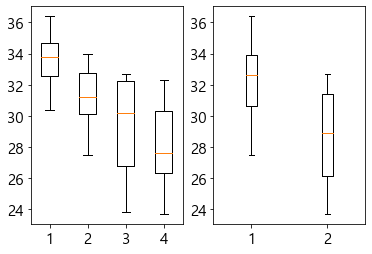

In [139]:
figure, ax = plt.subplots(ncols=2)
plt.subplot(ax[0])
plt.boxplot(df1)
plt.subplot(ax[1])
plt.boxplot(df2)

In [73]:
# 강종에 따른 분산분석

f_result = stats.f_oneway(df_aa, df_bb, df_cc, df_dd)

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

One-way
F 통계량 : [4.172]
p-value : [0.019]


In [74]:
# type에 따른 분산분석

f_result = stats.f_oneway(df_a, df_b)

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

One-way
F 통계량 : [9.654]
p-value : [0.005]


해석 : 먼저 강종에 따른 ANOVA 결과, F 통계량은 4.172, p-value는 0.019로 유의수준 0.05에서  
통계적으로 유의미함을 알 수 있습니다.  
type별 ANOVA 결과 또한 F 통계량은 9.654, p-value는 0.005로 통계적으로 유의미하다고 볼 수 있습니다.  
즉, 강종별과 type에 따라 2차정련 시간에 차이가 있다고 할 수 있습니다. 

### 실습7. 단순선형회귀

초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [112]:
# 회귀분석 패키지
from statsmodels.formula.api import ols
# 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델
import statsmodels.formula.api as smf

matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 사용
plt.rc('font', size=15) # 그래프 크기 조정
matplotlib.rc('font', family = 'Malgun Gothic') # 폰트 조정
 
# df = pd.DataFrame({'Strength' : [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5,
#                                 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5], 
#                    'Baking_time' : [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 
#                                     0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 
#                                     0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})

df_raw = pd.DataFrame({'Strength':[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5], 'Bakingtime':[0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})
df.describe()

,Strength,Baking_time
count,20.000000,20.000000
mean,36.965000,0.776221
std,1.565172,0.040759
min,33.000000,0.695121
25%,36.375000,0.741917
50%,37.150000,0.762333
75%,37.725000,0.810775
max,39.000000,0.849020


<AxesSubplot:xlabel='Baking_time', ylabel='Strength'>

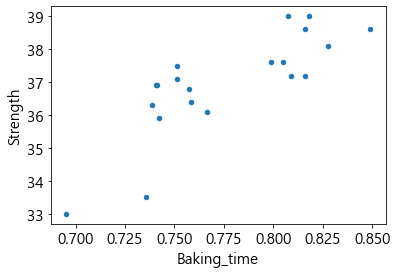

In [113]:
df.plot.scatter(x='Baking_time', y='Strength')

# 대체로 굽는 시간이 증가할수록, 강도도 증가하는 경향을 보임.

In [114]:
df.corr(method='pearson').round(3)

# 초코칩과 굽는 시간의 상관계수는 0.804로 높은 상관관계를 갖는다고 할 수 있음

,Strength,Baking_time
Strength,1.000,0.804
Baking_time,0.804,1.000


In [116]:
reg_model = smf.ols(formula = 'Baking_time ~ Strength', data = df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:            Baking_time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.95e-05
Time:                        23:24:27   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0023      0.135      0.017      0.9

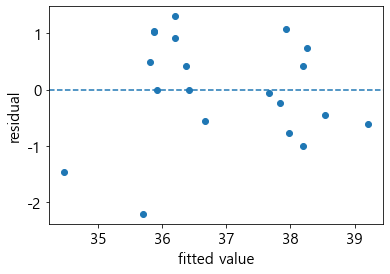

In [105]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

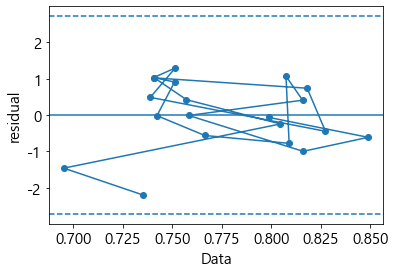

In [106]:
# 잔차의 독립성

plt.plot(df['Baking_time'], reg_result.resid, marker = 'o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--')

# 잔차가 0을 기준으로 랜덤하게 분포 => 등분산성과 독립성 만족

NormaltestResult(statistic=1.723828550857243, pvalue=0.422352808374984)

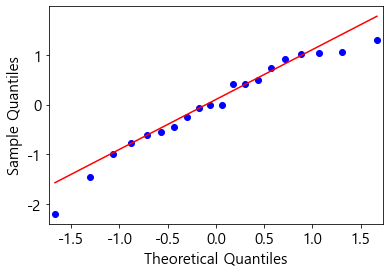

In [108]:
# 잔차 정규성 검정 : Q-Q plot, s-standardized line
# r-regression line, q-quartiles
qqplot(reg_result.resid, line='q')

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

# 정규분포 직선을 중심으로 분포하고 잔차에 대한 p-value가 0.422로 귀무가설을 채택하므로 정규분포를 따름.

회귀분석 결과 :  
1. y_hat =  13.0013 + 30.8722 * Baking_time  
Baking_time p-value : 0.000   
R-squared : 0.646  
F-statistic : 32.90  
p-value : 0.00002  
Prob(Omnibus): 0.266  
Durbin-Watson : 1.128

> 모델링 결과, 최종 회귀식은 1번과 같이 도출되었다.   
초콜릿 강도는 굽는 시간에 30.8722를 곱한 것과 13.0013을 더한 것을 값으로 갖는다.   
모델의 p-value는 0.00002로 회귀모델로서 유의하다고 볼 수 있다.  
굽는 시간에 대한 p-value는 0.000으로, 통계적으로 유의한 변수이다.   
R-squared는 0.646으로, 굽는 시간으로 초콜릿의 강도를 64.6% 정도 설명할 수 있다.   
설명력이 예상보다 낮게 측정된 것으로 보아, 굽는 시간 외 다른 변수를 고려할 필요성이 있다.  